In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cycler import cycler
import seaborn as sb
from pathlib import Path
import yaml

# Extract the robot positions from a path and compute the 2D distance between the robots. The distances are returned as an array looking like :
# [dist(1,2), dist(1,3), ..., dist(1, n)]
# [dist(2,3), dist(2, 4), ..., dist(2, n)]
# ...
# [dist(n-2, n-1), dist(n-2, n)]
# [dist(n-1, n)]

def get_robot_trajectories(path):

    files = os.listdir(path)
    files.sort()
    robot_position = [[] for i in range(len(files))]
    for i, file in enumerate(files):
        robot_position[i] = list(zip(pd.read_csv(path+'/'+file)['x'], pd.read_csv(path+'/'+file)['y']))

    return robot_position

def get_obstacles_positions(config_path):
    # read the config file (Need pyYaml >= 5.1)
    with open(config_path) as f:
        config = yaml.load(f, Loader=yaml.FullLoader)
    
    buildings = config['buildings']
    
    return buildings


def get_inter_robot_distances(path):
    
    files = os.listdir(path)
    files.sort()
    inter_robot_distances = [[[] for i in range(len(files))] for j in range(len(files))]
    for i, file in enumerate(files):
        robot_position = list(zip(pd.read_csv(path+'/'+file)['x'], pd.read_csv(path+'/'+file)['y']))
        for j, file in enumerate(files):
            if i != j and j > i:
                robot_position_2 = list(zip(pd.read_csv(path+'/'+file)['x'], pd.read_csv(path+'/'+file)['y']))
                inter_robot_distance = [np.linalg.norm(np.array(pose1) - np.array(pose2)) for pose1, pose2 in zip(robot_position, robot_position_2)]
                inter_robot_distances[i][j] = inter_robot_distance
                
    return inter_robot_distances

def plot_inter_robot_distances(ax, inter_robot_distances):

    n_rob = len(inter_robot_distances)
    lengths = [len(inter_robot_distances[i][j]) for i in range(n_rob) for j in range(n_rob) if i != j and j > i]
    x = np.arange(min(lengths))*0.02 # measures are taken every 0.02 seconds
    for i in range(n_rob):
        for j in range(n_rob):
            if i != j and j > i:
                ax.plot(x, inter_robot_distances[i][j][:min(lengths)], label="robot "+str(i+1)+" <-> robot "+str(j+1))
    ax.legend()
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Inter-robot Distance (m)")
    return ax
    
def plot_robot_trajectories(ax, robot_positions, obstacles):
    for i, robot_position in enumerate(robot_positions):
        ax.plot([x[0] for x in robot_position], [x[1] for x in robot_position], label="UAV "+str(i+1))
        
    for obstacle in obstacles:
        ax.add_patch(plt.Rectangle((obstacle['x']-obstacle['size_x']/2, obstacle['y']-obstacle['size_y']/2), obstacle['size_x'], obstacle['size_y']))

    ax.legend()
    ax.set_xlabel("x (m)")
    ax.set_ylabel("y (m)")
    
    return ax

# plt.rcParams['figure.figsize'] = [8, 8]

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## No obstacles

Flocking of 5 drones within DANCERS (no obstacles):


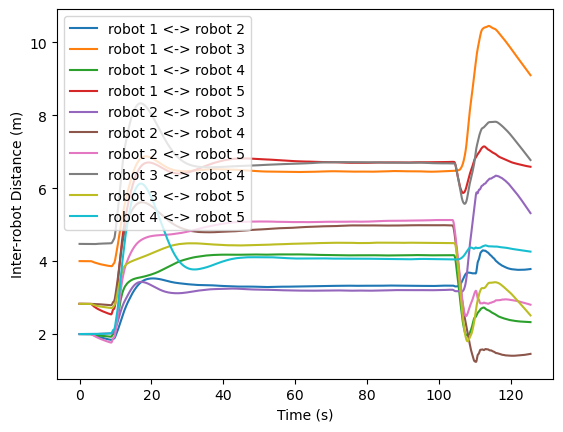

Flocking of 5 drones with perfect communication (no obstacles):


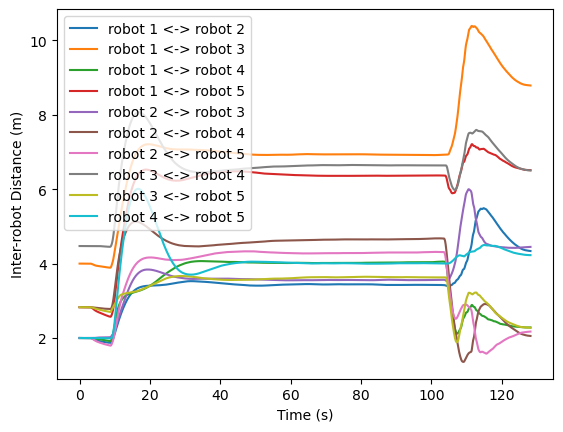

In [3]:
fig, ax = plt.subplots()
print("Flocking of 5 drones within DANCERS (no obstacles):")
plot_inter_robot_distances(ax, get_inter_robot_distances('../data/flocking/flocking_without_obstacles/run_1'))
plt.show()

fig, ax = plt.subplots()
print("Flocking of 5 drones with perfect communication (no obstacles):")
plot_inter_robot_distances(ax, get_inter_robot_distances('../data/flocking/flocking_without_obstacles/run_2'))
plt.show()

## No obstacles (longer)

Flocking of 5 drones within DANCERS (no obstacles):


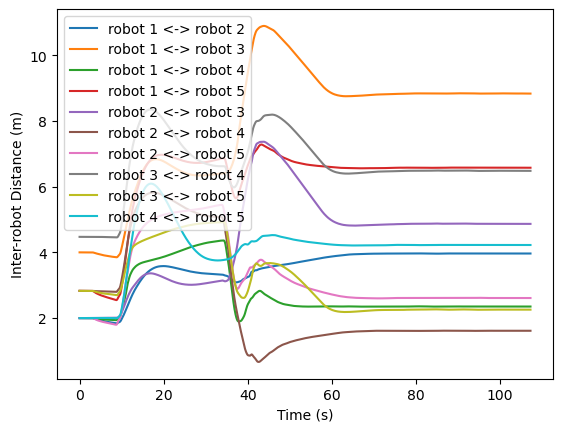

Flocking of 5 drones with perfect communication (no obstacles):


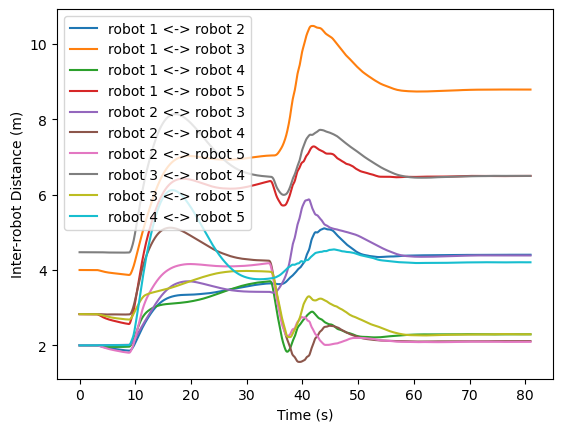

In [4]:
fig, ax = plt.subplots()
print("Flocking of 5 drones within DANCERS (no obstacles):")
plot_inter_robot_distances(ax, get_inter_robot_distances('../data/flocking/flocking_without_obstacles/run_3'))
plt.show()
fig, ax = plt.subplots()
print("Flocking of 5 drones with perfect communication (no obstacles):")
plot_inter_robot_distances(ax, get_inter_robot_distances('../data/flocking/flocking_without_obstacles/run_4'))
plt.show()

## With obstacles

Flocking of 5 drones within DANCERS :


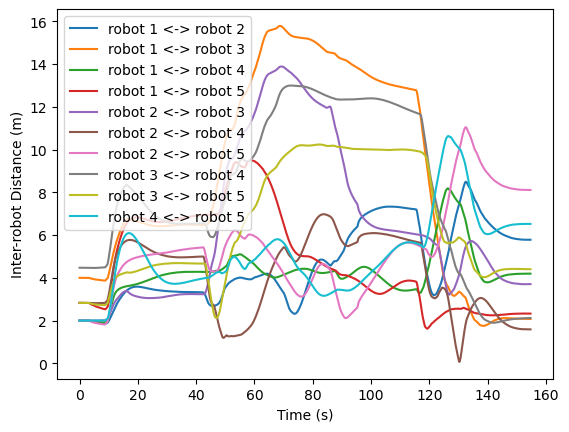

Flocking of 5 drones with perfect communication :


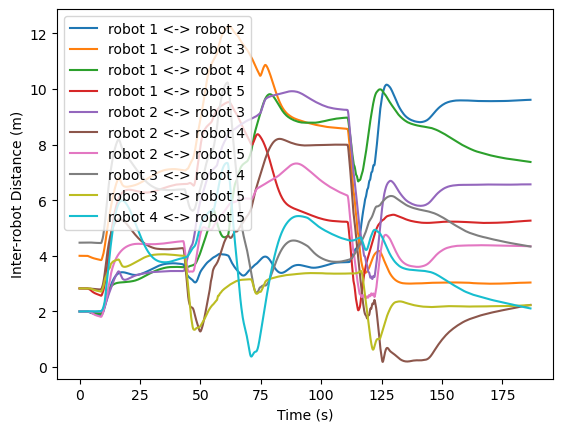

In [5]:
fig, ax = plt.subplots()
print("Flocking of 5 drones within DANCERS :")
plot_inter_robot_distances(ax, get_inter_robot_distances('../data/flocking/flocking_with_obstacles/run_1'))
plt.show()
fig, ax = plt.subplots()
print("Flocking of 5 drones with perfect communication :")
plot_inter_robot_distances(ax, get_inter_robot_distances('../data/flocking/flocking_with_obstacles/run_2'))
plt.show()

## Robot trajectories

(left) Flocking of 4 drones within a diverging obstacle (DANCERS) :
(right) Flocking of 4 drones within a diverging obstacle (Gazebo only) :


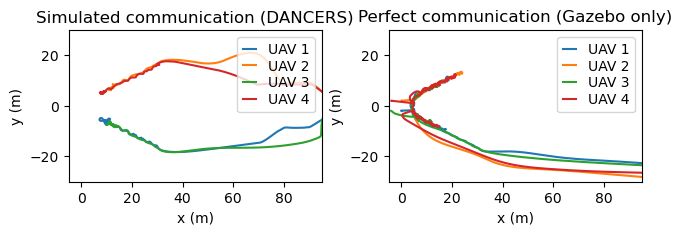

In [6]:
fig, axs = plt.subplots(1, 2, layout='constrained')
print("(left) Flocking of 4 drones within a diverging obstacle (DANCERS) :")
plot_robot_trajectories(axs[0], get_robot_trajectories('../data/flocking/flocking_diverging_obstacle/run_49'), get_obstacles_positions('../src/config/config_flocking_4.yaml'))
print("(right) Flocking of 4 drones within a diverging obstacle (Gazebo only) :")
plot_robot_trajectories(axs[1], get_robot_trajectories('../data/flocking/flocking_diverging_obstacle/run_52'), get_obstacles_positions('../src/config/config_flocking_4.yaml'))
axs[0].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[0].set_title("Simulated communication (DANCERS)")
axs[0].set_xlim(-5, 95)
axs[0].set_ylim(-30, 30)
axs[0].set_aspect('equal', adjustable='box')
axs[1].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[1].set_title("Perfect communication (Gazebo only)")
axs[1].set_xlim(-5, 95)
axs[1].set_ylim(-30, 30)
axs[1].set_aspect('equal', adjustable='box')

(left) Flocking of 4 drones within a diverging obstacle (DANCERS) :
(right) Flocking of 4 drones within a diverging obstacle (Gazebo only) :


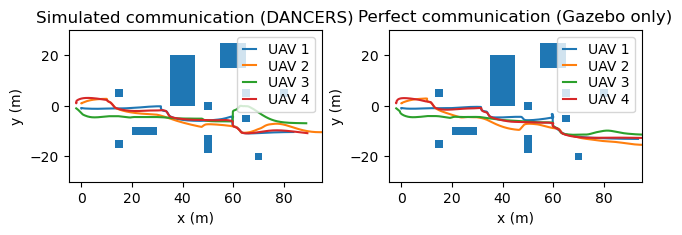

In [7]:
fig, axs = plt.subplots(1, 2, layout='constrained')
print("(left) Flocking of 4 drones within a diverging obstacle (DANCERS) :")
plot_robot_trajectories(axs[0], get_robot_trajectories('../data/flocking/flocking_config_3/run_2'), get_obstacles_positions('../src/config/config_flocking_3.yaml'))
print("(right) Flocking of 4 drones within a diverging obstacle (Gazebo only) :")
plot_robot_trajectories(axs[1], get_robot_trajectories('../data/flocking/flocking_config_3/run_3'), get_obstacles_positions('../src/config/config_flocking_3.yaml'))
axs[0].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[0].set_title("Simulated communication (DANCERS)")
axs[0].set_xlim(-5, 95)
axs[0].set_ylim(-30, 30)
axs[0].set_aspect('equal', adjustable='box')
axs[1].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[1].set_title("Perfect communication (Gazebo only)")
axs[1].set_xlim(-5, 95)
axs[1].set_ylim(-30, 30)
axs[1].set_aspect('equal', adjustable='box')

(left) Flocking of 6 drones within a diverging obstacle (DANCERS) :
(right) Flocking of 6 drones within a diverging obstacle (Gazebo only) :


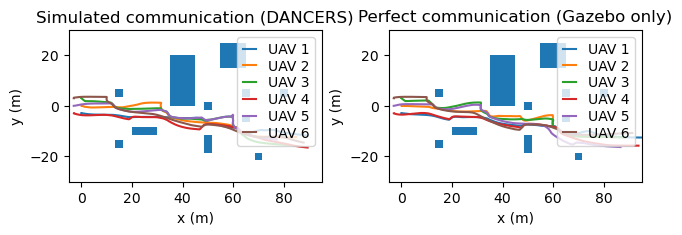

In [8]:
fig, axs = plt.subplots(1, 2, layout='constrained')
print("(left) Flocking of 6 drones within a diverging obstacle (DANCERS) :")
plot_robot_trajectories(axs[0], get_robot_trajectories('../data/flocking/flocking_config_3/run_7'), get_obstacles_positions('../src/config/config_flocking_3.yaml'))
print("(right) Flocking of 6 drones within a diverging obstacle (Gazebo only) :")
plot_robot_trajectories(axs[1], get_robot_trajectories('../data/flocking/flocking_config_3/run_9'), get_obstacles_positions('../src/config/config_flocking_3.yaml'))
axs[0].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[0].set_title("Simulated communication (DANCERS)")
axs[0].set_xlim(-5, 95)
axs[0].set_ylim(-30, 30)
axs[0].set_aspect('equal', adjustable='box')
axs[1].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[1].set_title("Perfect communication (Gazebo only)")
axs[1].set_xlim(-5, 95)
axs[1].set_ylim(-30, 30)
axs[1].set_aspect('equal', adjustable='box')

(left) Flocking of 6 drones within a diverging obstacle (DANCERS) :
(right) Flocking of 6 drones within a diverging obstacle (Gazebo only) :


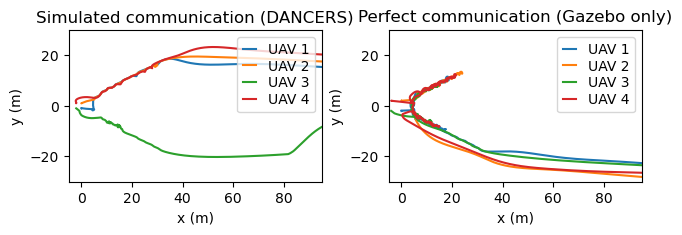

In [9]:
fig, axs = plt.subplots(1, 2, layout='constrained')
print("(left) Flocking of 6 drones within a diverging obstacle (DANCERS) :")
plot_robot_trajectories(axs[0], get_robot_trajectories('../data/flocking/flocking_diverging_obstacle/run_63'), get_obstacles_positions('../src/config/config_flocking_4.yaml'))
print("(right) Flocking of 6 drones within a diverging obstacle (Gazebo only) :")
plot_robot_trajectories(axs[1], get_robot_trajectories('../data/flocking/flocking_diverging_obstacle/run_52'), get_obstacles_positions('../src/config/config_flocking_4.yaml'))
axs[0].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[0].set_title("Simulated communication (DANCERS)")
axs[0].set_xlim(-5, 95)
axs[0].set_ylim(-30, 30)
axs[0].set_aspect('equal', adjustable='box')
axs[1].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[1].set_title("Perfect communication (Gazebo only)")
axs[1].set_xlim(-5, 95)
axs[1].set_ylim(-30, 30)
axs[1].set_aspect('equal', adjustable='box')

(left) Flocking of 6 drones within a diverging obstacle (DANCERS) :
(right) Flocking of 6 drones within a diverging obstacle (Gazebo only) :


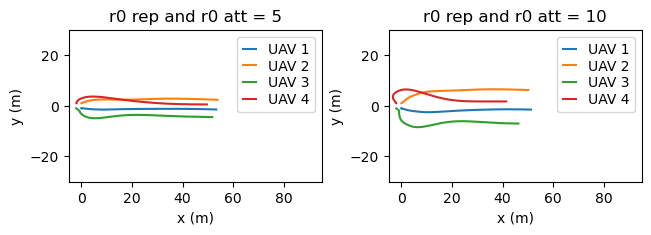

In [11]:
fig, axs = plt.subplots(1, 2, layout='constrained')
print("(left) Flocking of 6 drones within a diverging obstacle (DANCERS) :")
plot_robot_trajectories(axs[0], get_robot_trajectories('../data/flocking/flocking_test_params/run_1'), get_obstacles_positions('../src/config/config_flocking_4.yaml'))
print("(right) Flocking of 6 drones within a diverging obstacle (Gazebo only) :")
plot_robot_trajectories(axs[1], get_robot_trajectories('../data/flocking/flocking_test_params/run_2'), get_obstacles_positions('../src/config/config_flocking_4.yaml'))
axs[0].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[0].set_title("r0 rep and r0 att = 5")
axs[0].set_xlim(-5, 95)
axs[0].set_ylim(-30, 30)
axs[0].set_aspect('equal', adjustable='box')
axs[1].legend(loc='upper right', labelspacing=0.2, handlelength=1.0)
axs[1].set_title("r0 rep and r0 att = 10")
axs[1].set_xlim(-5, 95)
axs[1].set_ylim(-30, 30)
axs[1].set_aspect('equal', adjustable='box')